<a href="https://colab.research.google.com/github/cristiang26/Lab_4-senales-EMG/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install wfdb   #Instalacion en colab
import wfdb
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Parte A**

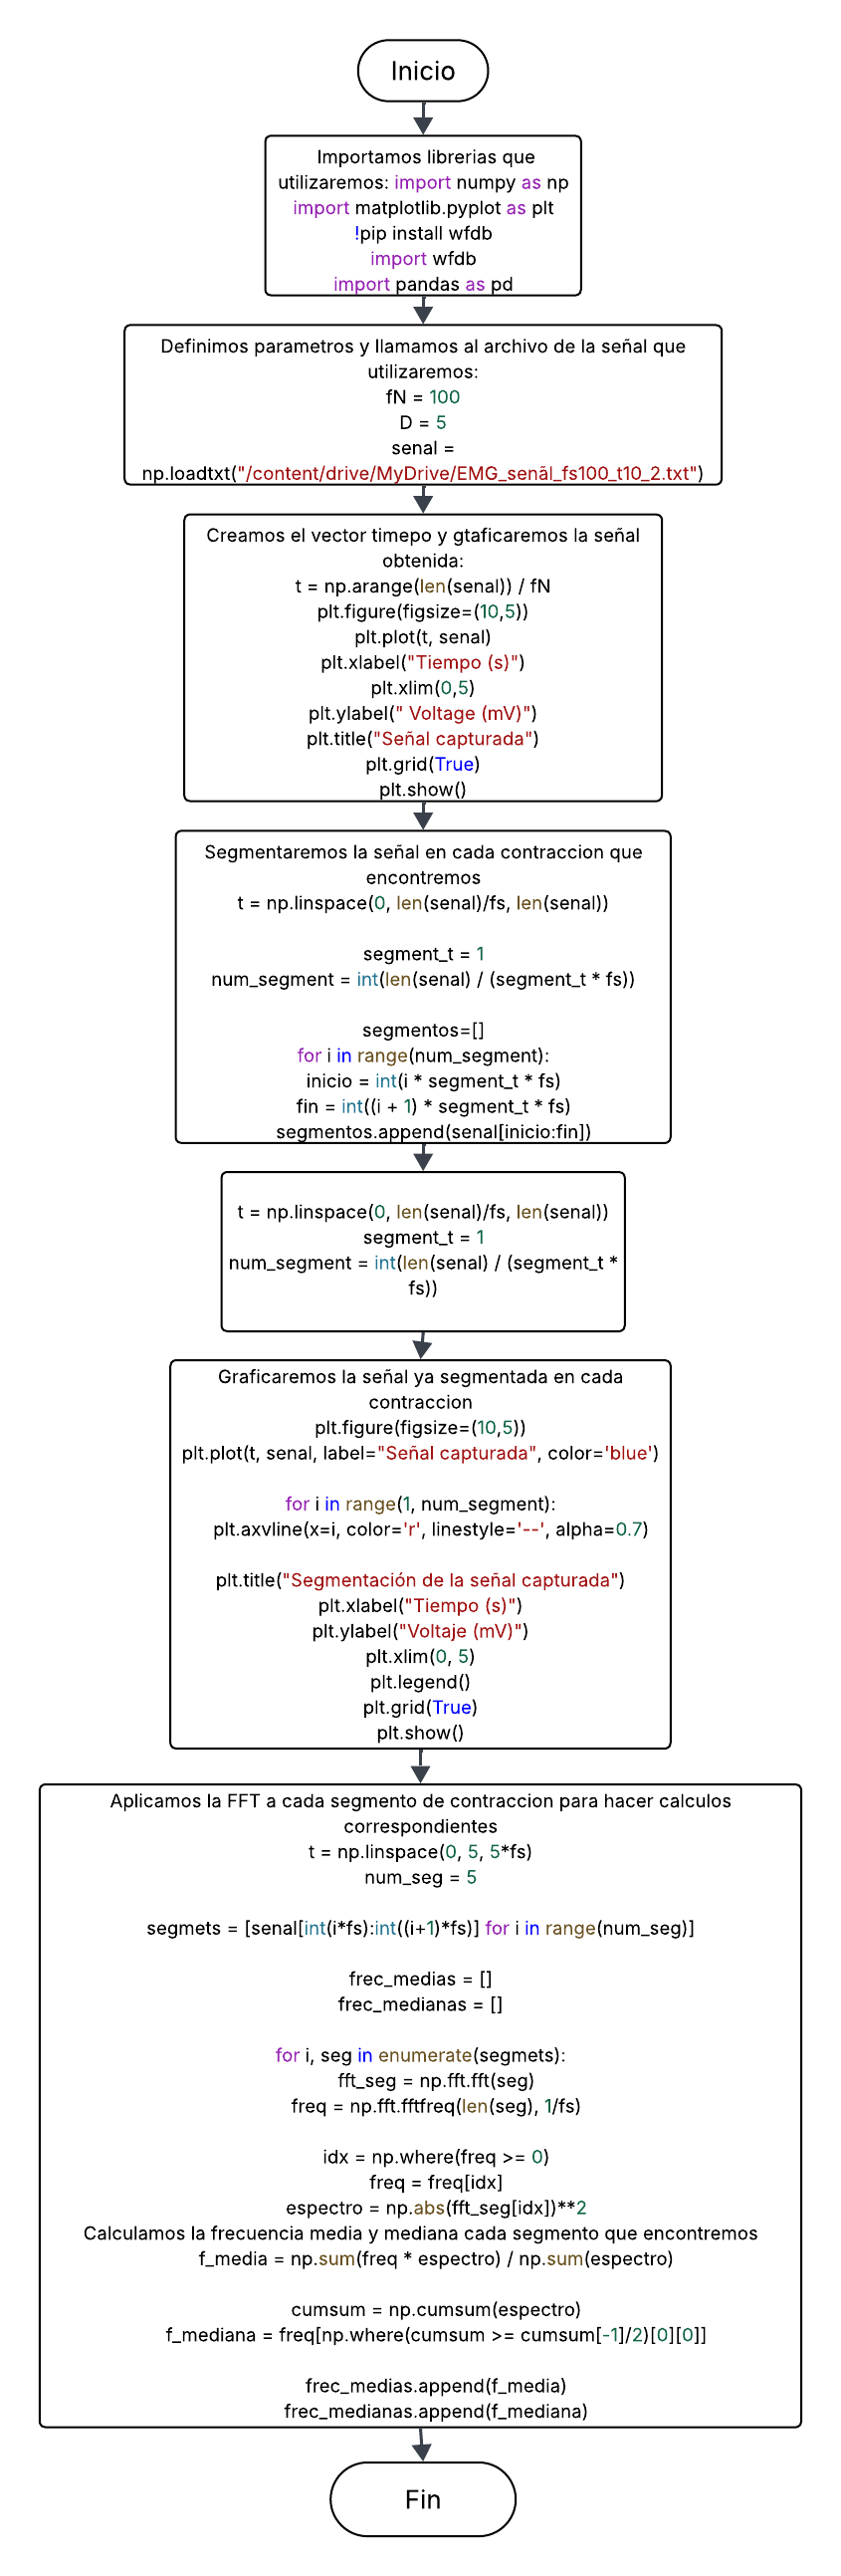

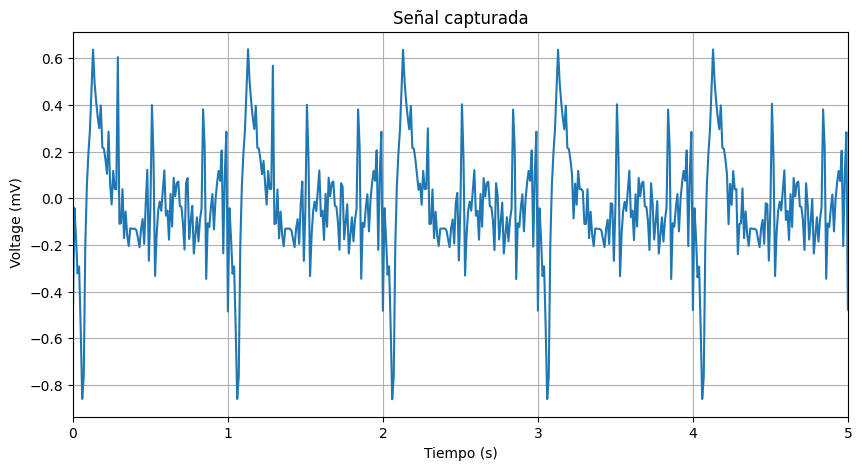

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fN = 100
D = 5
senal = np.loadtxt("/content/drive/MyDrive/EMG_señal_fs100_t10_2.txt")


t = np.arange(len(senal)) / fN
plt.figure(figsize=(10,5))
plt.plot(t, senal)
plt.xlabel("Tiempo (s)")
plt.xlim(0,5)
plt.ylabel(" Voltage (mV)")
plt.title("Señal capturada")
plt.grid(True)
plt.show()

Este código carga una señal electromiográfica (EMG) desde un archivo de texto y la representa gráficamente en función del tiempo. Primero define la frecuencia de muestreo (`fN = 100 Hz`) y calcula el vector de tiempo correspondiente. Luego, usa **Matplotlib** para trazar la señal medida (en milivoltios) durante los primeros 5 segundos, mostrando así cómo varía la actividad eléctrica del músculo a lo largo del tiempo.


**Segmentacion de la señal**

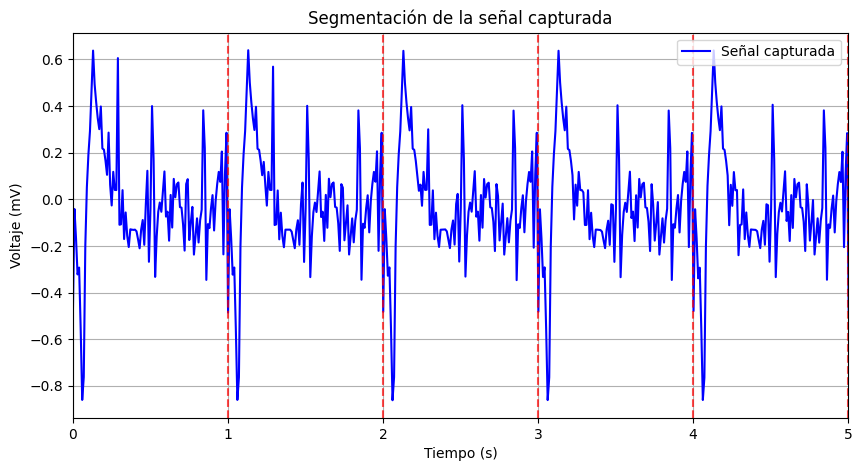

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100

senal = np.loadtxt("/content/drive/MyDrive/EMG_señal_fs100_t10_2.txt")

t = np.linspace(0, len(senal)/fs, len(senal))
segment_t = 1
num_segment = int(len(senal) / (segment_t * fs))

plt.figure(figsize=(10,5))
plt.plot(t, senal, label="Señal capturada", color='blue')

for i in range(1, num_segment):
    plt.axvline(x=i, color='r', linestyle='--', alpha=0.7)

plt.title("Segmentación de la señal capturada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (mV)")
plt.xlim(0, 5)
plt.legend()
plt.grid(True)
plt.show()


Este código carga una señal electromiográfica (EMG), crea su eje temporal y la segmenta en intervalos de 1 segundo. Cada segmento se almacena para análisis posteriores, y en la gráfica se muestran líneas rojas punteadas que indican los límites entre los segmentos. De esta forma, se puede visualizar claramente cómo se divide la señal en partes iguales para estudiar su comportamiento en distintos momentos del registro.

**Frecuencia media y mediana**

segmento 1:
frecuencia media: 12.10 Hz
frecuencia mediana: 6.00 Hz
segmento 2:
frecuencia media: 11.84 Hz
frecuencia mediana: 6.00 Hz
segmento 3:
frecuencia media: 11.17 Hz
frecuencia mediana: 6.00 Hz
segmento 4:
frecuencia media: 10.90 Hz
frecuencia mediana: 6.00 Hz
segmento 5:
frecuencia media: 11.00 Hz
frecuencia mediana: 6.00 Hz


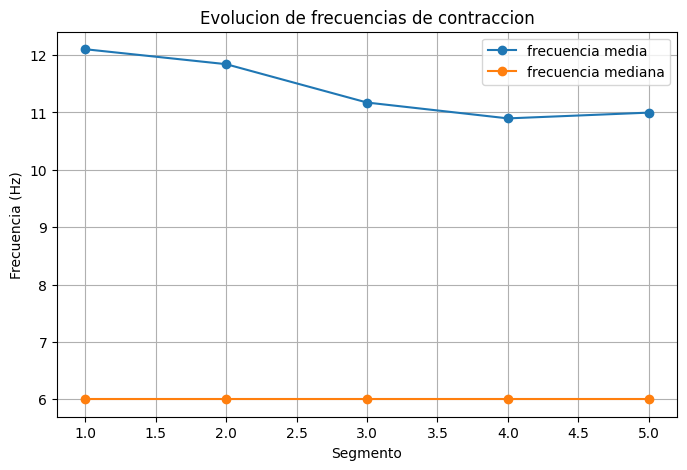

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100
senal = np.loadtxt("/content/drive/MyDrive/EMG_señal_fs100_t10_2.txt")

t = np.linspace(0, 5, 5*fs)
num_seg = 5

segmets = [senal[int(i*fs):int((i+1)*fs)] for i in range(num_seg)]

frec_medias = []
frec_medianas = []

for i, seg in enumerate(segmets):
      fft_seg = np.fft.fft(seg)
      freq = np.fft.fftfreq(len(seg), 1/fs)

      idx = np.where(freq >= 0)
      freq = freq[idx]
      espectro = np.abs(fft_seg[idx])**2

      f_media = np.sum(freq * espectro) / np.sum(espectro)

      cumsum = np.cumsum(espectro)
      f_mediana = freq[np.where(cumsum >= cumsum[-1]/2)[0][0]]


      frec_medias.append(f_media)
      frec_medianas.append(f_mediana)


      print(f"segmento {i+1}:")
      print(f"frecuencia media: {f_media:.2f} Hz")
      print(f"frecuencia mediana: {f_mediana:.2f} Hz")


plt.figure(figsize=(8,5))
plt.plot(range(1, num_seg+1), frec_medias, 'o-', label='frecuencia media')
plt.plot(range(1, num_seg+1), frec_medianas, 'o-', label='frecuencia mediana')
plt.xlabel('Segmento')
plt.ylabel('Frecuencia (Hz)')
plt.title('Evolucion de frecuencias de contraccion')
plt.legend()
plt.grid(True)
plt.show()


Este código realiza un **análisis espectral evolutivo** de una señal electromiográfica (EMG) con el fin de estudiar cómo varía su contenido en frecuencia a lo largo del tiempo. Primero, se divide la señal en cinco segmentos de un segundo cada uno, asumiendo una frecuencia de muestreo de 100 Hz.

Para cada segmento, se aplica la Transformada Rápida de Fourier (FFT), que permite obtener el espectro de potencia, es decir, la distribución de la energía de la señal en función de la frecuencia. A partir de este espectro, se calculan dos parámetros representativos del comportamiento frecuencial:

Frecuencia media (f media): representa el promedio ponderado de las frecuencias según la energía del espectro. Un valor alto indica la presencia dominante de componentes de alta frecuencia.
Frecuencia mediana (f mediana): es la frecuencia que divide el espectro en dos mitades de energía iguales, proporcionando una medida robusta frente a picos o ruidos.

Estos valores se calculan para cada segmento y se grafican en función del número de segmento, lo que permite visualizar su evolución temporal.

En el contexto del análisis EMG, una disminución progresiva de las frecuencias media y mediana suele asociarse con la aparición de fatiga muscular, ya que refleja una reducción en la velocidad de conducción de las fibras musculares y un aumento relativo de la actividad de fibras más lentas (tipo I). Por tanto, este procedimiento no solo permite caracterizar la señal en el dominio de la frecuencia, sino también evaluar de manera cuantitativa el estado fisiológico del músculo durante un esfuerzo sostenido.


**Parte B**

Dimensiones del archivo: (93000, 2)


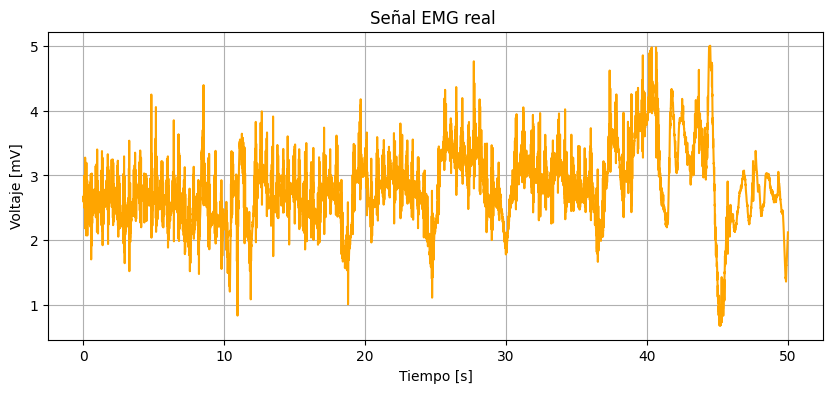

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.loadtxt('/content/drive/MyDrive/Senal_lab_4_parteb.txt')
print("Dimensiones del archivo:", datos.shape)

# columnas → tiempo y señal
if datos.shape[1] == 2:
    tiempo = datos[:,0]
    senal = datos[:,1]
else:
    # Si solo hay una columna, el tiempo se genera artificialmente
    senal = datos
    fs = 1000  # frecuencia de muestreo (ajusta)
    tiempo = np.arange(len(senal)) / fs

fs = 1000
duracion_deseada = 50
muestras = int(duracion_deseada * fs)

plt.figure(figsize=(10,4))
plt.plot(tiempo[:muestras], senal[:muestras], color='orange')
plt.title('Señal EMG real ')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [mV]')
plt.grid(True)
plt.show()


Este código carga y visualiza una señal electromiográfica (EMG) real proveniente de un archivo de texto. Primero, verifica la estructura del archivo para determinar si contiene dos columnas (tiempo y amplitud) o solo una (señal). En caso de tener una sola columna, el vector de tiempo se genera artificialmente usando una frecuencia de muestreo de 1000 Hz.

Luego, se seleccionan los primeros 50 segundos de la grabación y se grafica la señal en función del tiempo. La figura resultante muestra cómo varía el voltaje muscular (en milivoltios) a lo largo del registro, permitiendo visualizar la actividad eléctrica del músculo, su nivel de ruido, y la presencia de posibles contracciones o patrones característicos. Esta etapa es fundamental como análisis preliminar antes de aplicar filtrado o procesamiento espectral posterior.

**Filtro (20-450)Hz**

Estimación de fs = 1000.000 Hz (dt_med = 0.001000 s)


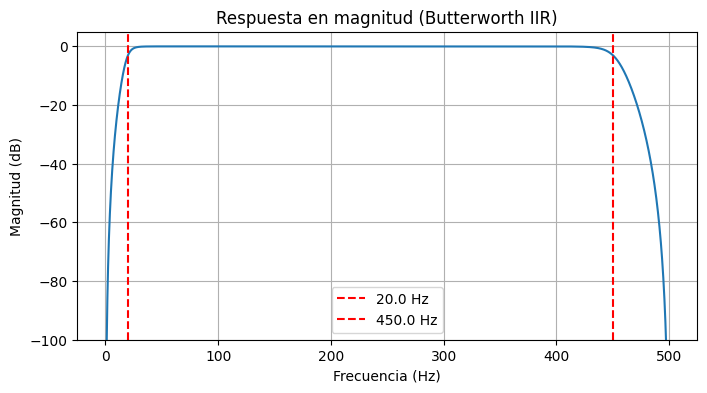

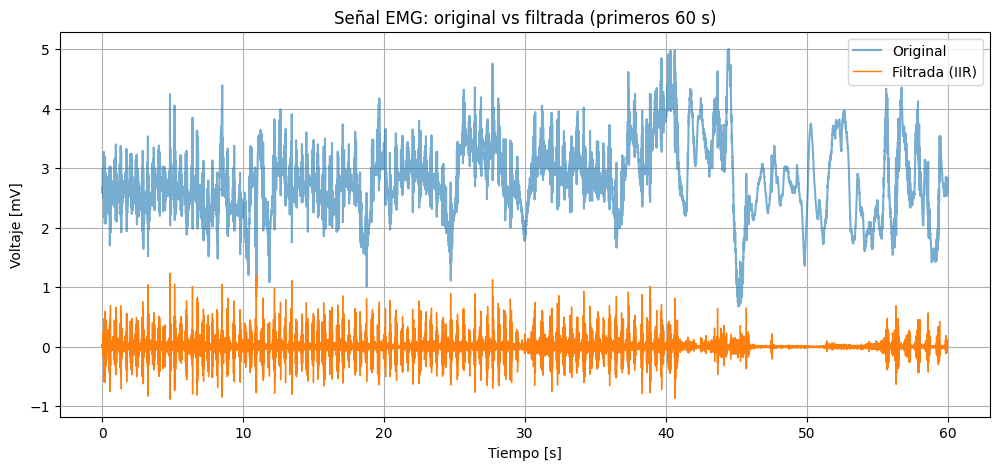

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfiltfilt, sosfreqz


ruta = '/content/drive/MyDrive/Senal_lab_4_parteb.txt'


datos = np.loadtxt(ruta)

if datos.ndim == 1:
    print("Archivo con 1 columna; ajusta 'fs' manualmente si es necesario.")
    fs = 1000.0
    senal = datos
    tiempo = np.arange(len(senal)) / fs
else:
    tiempo = datos[:,0].astype(float)
    senal  = datos[:,1].astype(float)

    dt = np.diff(tiempo)
    dt_med = np.median(dt)
    fs = 1.0 / dt_med
    print(f"Estimación de fs = {fs:.3f} Hz (dt_med = {dt_med:.6f} s)")

lowcut = 20.0     # Hz
highcut = 450.0   # Hz

fN = fs / 2.0
if highcut >= fN:
    raise ValueError(f"highcut = {highcut} Hz >= Nyquist ({fN:.1f} Hz). Reduce highcut o aumenta fs.")

orden = 4
sos = butter(orden, [lowcut, highcut], btype='bandpass', fs=fs, output='sos')

w, h = sosfreqz(sos, worN=4096, fs=fs)
mag_db = 20 * np.log10(np.maximum(np.abs(h), 1e-12))

plt.figure(figsize=(8,4))
plt.plot(w, mag_db)
plt.axvline(lowcut, color='r', linestyle='--', label=f'{lowcut} Hz')
plt.axvline(highcut, color='r', linestyle='--', label=f'{highcut} Hz')
plt.title('Respuesta en magnitud (Butterworth IIR)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.ylim([-100, 5])
plt.grid(True)
plt.legend()
plt.show()

senal_filtrada = sosfiltfilt(sos, senal)

duracion_vista = 60.0
muestras_vista = int(min(len(senal), duracion_vista * fs))

plt.figure(figsize=(12,5))
plt.plot(tiempo[:muestras_vista], senal[:muestras_vista], label='Original', alpha=0.6)
plt.plot(tiempo[:muestras_vista], senal_filtrada[:muestras_vista], label='Filtrada (IIR)', linewidth=1)
plt.title(f'Señal EMG: original vs filtrada (primeros {duracion_vista:.0f} s)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [mV]')
plt.legend()
plt.grid(True)
plt.show()


Este código carga una señal electromiográfica (EMG), calcula su frecuencia de muestreo y aplica un filtro pasa banda Butterworth (20–450 Hz) para eliminar ruido de baja y alta frecuencia, conservando solo las componentes útiles del músculo. Se muestra la respuesta en frecuencia del filtro y luego se comparan las señales original y filtrada, evidenciando cómo el filtrado mejora la calidad del registro y resalta la actividad muscular real.

**Segmentos de las contracciones**

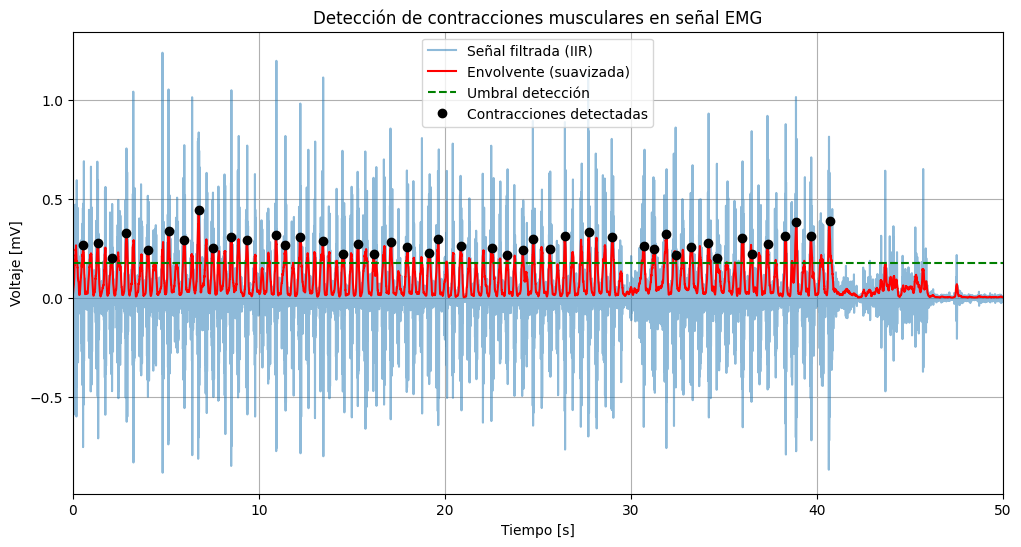

Se detectaron 65 contracciones en la señal.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


senal_rectificada = np.abs(senal_filtrada)


fs = int(1 / np.median(np.diff(tiempo)))
ventana = int(0.1 * fs)
envolvente = np.convolve(senal_rectificada, np.ones(ventana)/ventana, mode='same')

umbral = 0.4 * np.max(envolvente)

peaks, _ = find_peaks(envolvente, height=umbral, distance=fs*0.5)

plt.figure(figsize=(12,6))
plt.plot(tiempo, senal_filtrada, label='Señal filtrada (IIR)', alpha=0.5)
plt.plot(tiempo, envolvente, color='red', label='Envolvente (suavizada)')
plt.axhline(umbral, color='green', linestyle='--', label='Umbral detección')
plt.plot(tiempo[peaks], envolvente[peaks], 'ko', label='Contracciones detectadas')
plt.title("Detección de contracciones musculares en señal EMG")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [mV]")
plt.xlim(0,50)
plt.legend()
plt.grid(True)
plt.show()


duracion_contraccion = 1.0
mitad = int((duracion_contraccion/2) * fs)

segmentos = []
for p in peaks:
    ini = max(p - mitad, 0)
    fin = min(p + mitad, len(senal_filtrada))
    segmentos.append(senal_filtrada[ini:fin])

print(f"Se detectaron {len(peaks)} contracciones en la señal.")

Este código se encarga de **detectar y segmentar las contracciones musculares** presentes en una señal electromiográfica (EMG) previamente filtrada.

Primero, se **rectifica la señal** (tomando su valor absoluto) y se aplica una **media móvil de 100 ms** para obtener la **envolvente**, que refleja la variación de la amplitud muscular en el tiempo. Luego, se define un **umbral automático** equivalente al 40 % del valor máximo de esa envolvente, y se emplea la función `find_peaks` para **identificar los picos** que superan dicho umbral, los cuales corresponden a **contracciones musculares**.

En la gráfica resultante se muestran la señal filtrada, la envolvente suavizada, el umbral de detección y los puntos donde se detectan las contracciones. Finalmente, el código **segmenta la señal alrededor de cada pico** (1 s por contracción) para facilitar análisis posteriores, como el estudio del espectro o de la fatiga muscular.


**Media y mediana de las contracciones con sus evoluciones**

Estimación de fs = 1000.000 Hz (dt_med = 0.001000 s)


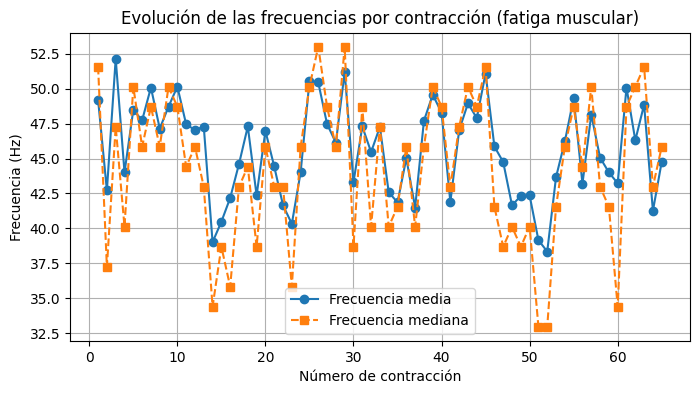

Contracción 1: f_media = 49.22 Hz | f_mediana = 51.58 Hz
Contracción 2: f_media = 42.71 Hz | f_mediana = 37.25 Hz
Contracción 3: f_media = 52.15 Hz | f_mediana = 47.28 Hz
Contracción 4: f_media = 44.00 Hz | f_mediana = 40.11 Hz
Contracción 5: f_media = 48.49 Hz | f_mediana = 50.14 Hz
Contracción 6: f_media = 47.74 Hz | f_mediana = 45.85 Hz
Contracción 7: f_media = 50.09 Hz | f_mediana = 48.71 Hz
Contracción 8: f_media = 47.15 Hz | f_mediana = 45.85 Hz
Contracción 9: f_media = 48.71 Hz | f_mediana = 50.14 Hz
Contracción 10: f_media = 50.15 Hz | f_mediana = 48.71 Hz
Contracción 11: f_media = 47.45 Hz | f_mediana = 44.41 Hz
Contracción 12: f_media = 47.04 Hz | f_mediana = 45.85 Hz
Contracción 13: f_media = 47.29 Hz | f_mediana = 42.98 Hz
Contracción 14: f_media = 39.01 Hz | f_mediana = 34.38 Hz
Contracción 15: f_media = 40.47 Hz | f_mediana = 38.68 Hz
Contracción 16: f_media = 42.18 Hz | f_mediana = 35.82 Hz
Contracción 17: f_media = 44.61 Hz | f_mediana = 42.98 Hz
Contracción 18: f_media

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfiltfilt, find_peaks


ruta = '/content/drive/MyDrive/Senal_lab_4_parteb.txt'
datos = np.loadtxt(ruta)

if datos.ndim == 1:
    print("Archivo con 1 columna; ajusta 'fs' manualmente si es necesario.")
    fs = 1000.0
    senal = datos
    tiempo = np.arange(len(senal)) / fs
else:
    tiempo = datos[:,0].astype(float)
    senal  = datos[:,1].astype(float)

    dt = np.diff(tiempo)
    dt_med = np.median(dt)
    fs = 1.0 / dt_med
    print(f"Estimación de fs = {fs:.3f} Hz (dt_med = {dt_med:.6f} s)")


lowcut = 20.0     # Hz
highcut = 450.0   # Hz
orden = 4

fN = fs / 2.0
if highcut >= fN:
    print(f"Warning: highcut = {highcut} Hz >= Nyquist ({fN:.1f} Hz). Adjusting highcut to {fN*0.9:.1f} Hz.")
    highcut = fN * 0.9

sos = butter(orden, [lowcut, highcut], btype='bandpass', fs=fs, output='sos')
senal_filtrada = sosfiltfilt(sos, senal)


senal_rectificada = np.abs(senal_filtrada)
ventana = int(0.1 * fs)
envolvente = np.convolve(senal_rectificada, np.ones(ventana)/ventana, mode='same')


umbral = 0.4 * np.max(envolvente)
peaks, _ = find_peaks(envolvente, height=umbral, distance=fs*0.5)


duracion_contraccion = 0.7
ventana = int(duracion_contraccion * fs / 2)

frecuencia_media = []
frecuencia_mediana = []


for i, p in enumerate(peaks):
    ini = max(p - ventana, 0)
    fin = min(p + ventana, len(senal_filtrada))
    segmento = senal_filtrada[ini:fin]


    fft_seg = np.fft.fft(segmento)
    freqs = np.fft.fftfreq(len(segmento), 1/fs)
    idx = np.where(freqs >= 0)
    freqs = freqs[idx]
    espectro = np.abs(fft_seg[idx])**2


    f_media = np.sum(freqs * espectro) / np.sum(espectro)
    frecuencia_media.append(f_media)


    cumsum = np.cumsum(espectro)
    if len(np.where(cumsum >= cumsum[-1]/2)[0]) > 0:
        f_mediana = freqs[np.where(cumsum >= cumsum[-1]/2)[0][0]]
        frecuencia_mediana.append(f_mediana)
    else:
        frecuencia_mediana.append(np.nan)



contracciones = np.arange(1, len(peaks)+1)

plt.figure(figsize=(8,4))
plt.plot(contracciones, frecuencia_media, 'o-', label='Frecuencia media')
plt.plot(contracciones, frecuencia_mediana, 's--', label='Frecuencia mediana')
plt.title('Evolución de las frecuencias por contracción (fatiga muscular)')
plt.xlabel('Número de contracción')
plt.ylabel('Frecuencia (Hz)')
plt.legend()
plt.grid(True)
plt.show()


for i, (fm, fmed) in enumerate(zip(frecuencia_media, frecuencia_mediana)):
    print(f"Contracción {i+1}: f_media = {fm:.2f} Hz | f_mediana = {fmed:.2f} Hz")

Este código realiza un análisis completo de una señal electromiográfica (EMG), desde el filtrado hasta el **cálculo de parámetros espectrales asociados a la actividad muscular.

Primero, carga los datos de la señal y determina la frecuencia de muestreo (fs). Luego, aplica un filtro pasa banda Butterworth (20–450 Hz) para eliminar el ruido de baja frecuencia (movimientos o artefactos) y las altas frecuencias no relevantes, dejando solo el contenido útil de la señal muscular.

Posteriormente, la señal filtrada se rectifica y suaviza mediante una media móvil de 100 ms para obtener su envolvente, que refleja la intensidad de las contracciones. Con un umbral adaptativo (40 % del valor máximo de la envolvente) y la función `find_peaks`, se detectan automáticamente las contracciones en la señal.

Finalmente, alrededor de cada contracción detectada se extrae un segmento (≈0.7 s) y se calcula su Transformada Rápida de Fourier (FFT). A partir del espectro obtenido, el código estima dos indicadores importantes:

Frecuencia media, que representa la energía promedio del espectro.
Frecuencia mediana, que divide la energía total del espectro en dos mitades.

Estos parámetros permiten cuantificar los cambios en la distribución frecuencial de la señal EMG, útiles para estudiar fenómenos como la fatiga muscular o la variación en el reclutamiento de unidades motoras durante el esfuerzo.


**Parte C**

**FFT con grafica de Frecuencia vs Magnitud**

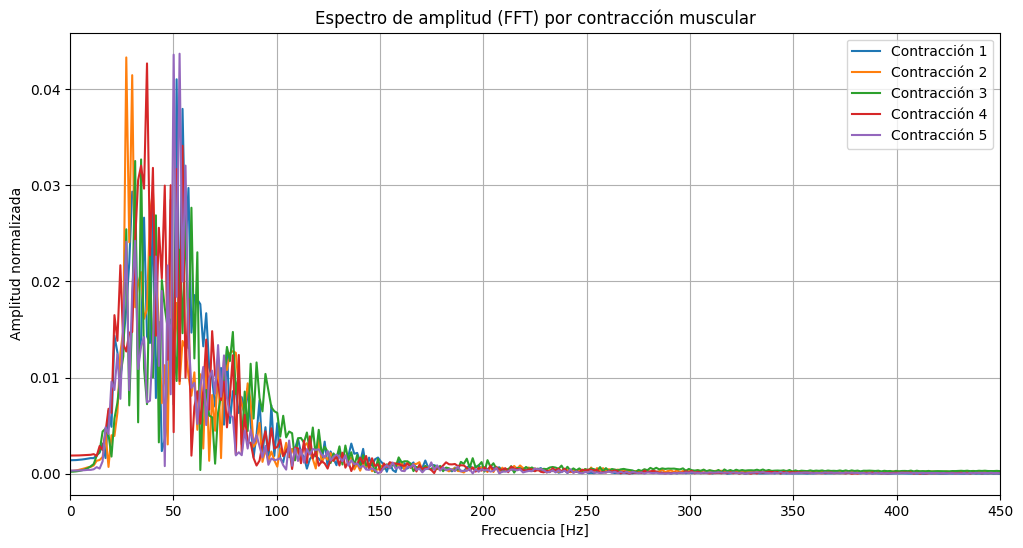

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

duracion_contraccion = 0.7
ventana = int(duracion_contraccion * fs / 2)


plt.figure(figsize=(12, 6))

for i, p in enumerate(peaks[:5]):
    ini = max(p - ventana, 0)
    fin = min(p + ventana, len(senal_filtrada))
    segmento = senal_filtrada[ini:fin]


    N = len(segmento)
    fft_seg = np.fft.fft(segmento)
    freqs = np.fft.fftfreq(N, 1/fs)


    idx = np.where(freqs >= 0)
    freqs = freqs[idx]
    amplitud = np.abs(fft_seg[idx]) / N

    plt.plot(freqs, amplitud, label=f'Contracción {i+1}')

plt.title('Espectro de amplitud (FFT) por contracción muscular')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud normalizada')
plt.xlim(0, 450)
plt.legend()
plt.grid(True)
plt.show()


Este código realiza el análisis espectral de las primeras contracciones musculares detectadas en una señal electromiográfica (EMG).

Para cada una de las cinco primeras contracciones, se extrae un segmento de 0.7 segundos alrededor del pico de máxima actividad. Luego, a cada segmento se le aplica la Transformada Rápida de Fourier (FFT) para obtener su espectro de amplitud, que muestra cómo se distribuye la energía de la señal en distintas frecuencias.

Finalmente, se grafican los espectros de las contracciones en una misma figura, lo que permite comparar su contenido frecuencial. Este tipo de análisis es útil para observar variaciones entre contracciones, detectar desplazamientos del pico espectral y evaluar posibles signos de fatiga muscular o cambios en el reclutamiento de fibras

**Primeras e ultimas contracciones, y reduccion de alto contenido de altas frecuencias asociada a la fatiga**

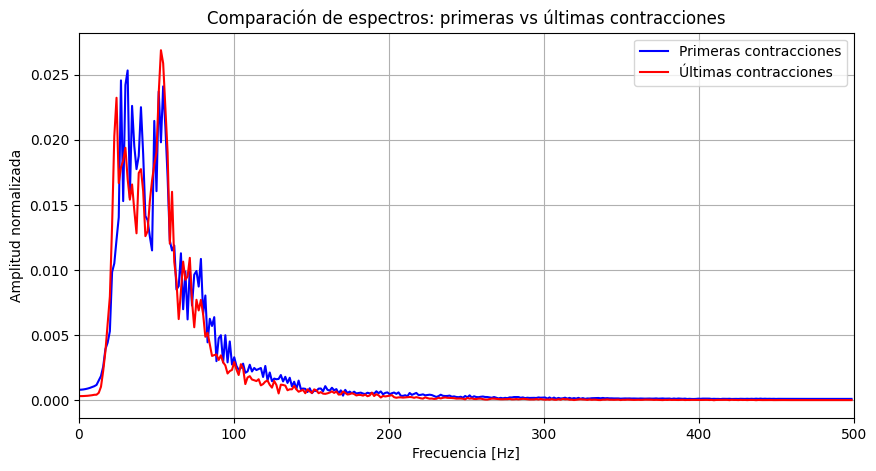

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


duracion_contraccion = 0.7
ventana = int(duracion_contraccion * fs / 2)


primeras = peaks[:5]
ultimas = peaks[-5:]

def calcular_fft(segmento, fs):
    N = len(segmento)
    fft_seg = np.fft.fft(segmento)
    freqs = np.fft.fftfreq(N, 1/fs)
    idx = np.where(freqs >= 0)
    freqs = freqs[idx]
    amplitud = np.abs(fft_seg[idx]) / N
    return freqs, amplitud

def promedio_fft(indices):
    espectros = []
    for p in indices:
        ini = max(p - ventana, 0)
        fin = min(p + ventana, len(senal_filtrada))
        seg = senal_filtrada[ini:fin]
        f, a = calcular_fft(seg, fs)
        espectros.append(a)
    espectros = np.mean(espectros, axis=0)
    return f, espectros

f1, spec_primeras = promedio_fft(primeras)
f2, spec_ultimas = promedio_fft(ultimas)


plt.figure(figsize=(10,5))
plt.plot(f1, spec_primeras, label='Primeras contracciones', color='blue')
plt.plot(f2, spec_ultimas, label='Últimas contracciones', color='red')
plt.title('Comparación de espectros: primeras vs últimas contracciones')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud normalizada')
plt.xlim(0, 500)
plt.legend()
plt.grid(True)
plt.show()


## e. Desplazamiento del pico espectral y su relación con el esfuerzo sostenido

Cuando se comparan los espectros de las primeras contracciones (azul) con las últimas (rojo), se nota que en las últimas el pico espectral se ha movido hacia frecuencias más bajas.

El impacto de la fatiga muscular durante un esfuerzo sostenido se manifiesta en este fenómeno.
En condiciones iniciales, la frecuencia media de descarga es más alta en las unidades motoras reclutadas, y los potenciales de acción se conducen con mayor rapidez. Esto se manifiesta como un pico espectral en frecuencias más elevadas (por ejemplo, entre 80 y 120 Hz).
Conforme el músculo se va cansando:

La velocidad de conducción de las fibras musculares se reduce,la frecuencia media del espectro disminuye,

Y el pico principal se mueve hacia frecuencias más bajas, como las que van de 60 a 90 Hz.

En términos fisiológicos, este desplazamiento es un indicador claro del agotamiento metabólico y del reclutamiento compensatorio de fibras más lentas (tipo I).
El desplazamiento del pico espectral hacia frecuencias bajas con el tiempo o con contracciones sucesivas confirma la aparición de fatiga muscular durante el esfuerzo sostenido.




## f. Conclusiones sobre el uso del análisis espectral como herramienta diagnóstica en electromiografía


El análisis espectral de las señales EMG es un instrumento eficaz para evaluar el comportamiento de los músculos, dado que posibilita la obtención de información acerca del estado fisiológico de las fibras activas sin requerir procedimientos invasivos.

Entre sus beneficios diagnósticos más importantes se encuentran:

Detección de la fatiga muscular: La reducción del pico espectral o de la frecuencia media del espectro posibilita medir la fatiga local.

El reclutamiento neuromuscular se evalúa mediante la observación de cambios en la distribución espectral, que indican alteraciones en el tipo de fibras que son reclutadas.

Control clínico o deportivo: tiene la posibilidad de ser empleado para examinar cómo responden los músculos ante la rehabilitación, el entrenamiento o las afecciones neuromusculares.

Suplemento del análisis temporal: a diferencia del análisis en el dominio temporal, que revela la duración o amplitud de la señal, el espectral aporta información sobre el contenido en frecuencia y su evolución.

El análisis espectral en electromiografía constituye una herramienta diagnóstica no invasiva, objetiva y sensible para detectar cambios asociados a la fatiga muscular, disfunciones neuromusculares y adaptaciones al entrenamiento, aportando información complementaria al análisis temporal clásico.